<a href="https://colab.research.google.com/github/Atenea2023/Actividad-11/blob/main/Actividad_11_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****

**ACTIVIDAD 11 APRENDIZAJE AUTOMATICO**


Stefania Aricapa Mora

C.C 1193558543

# PUNTO 1 K-VECINOS

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**DATASET**

In [69]:
#librerias a importar
import pandas as pd
import numpy as np
df= pd.read_csv('diabetes_prediction_dataset.csv', delimiter=',')

El dataset escogido para este ejercicio es sobre la diabetes. El proposito será predecir si una persona tiene diabetes.

In [71]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# **Limpieza**

Al revisar el dataset por primera vez, se puede observar que el dataset no cuenta con datos nulos y el nombre de las columnas está en inglés. Si bien varios datos son númericos; hay dos columnas cuyos datos están en objeto.

Para la limpieza primero se cambiarán los nombres de las columnas a español.

In [74]:
df.set_axis(['genero', 'edad', 'hipertension','enfermedades_cardiacas','historial_de_fumar','bmi', 'hemoglobina', 'nivel_glucosa', 'diabetes'],
                    axis='columns', inplace=True)

<ipython-input-74-c16f48e59a90>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['genero', 'edad', 'hipertension','enfermedades_cardiacas','historial_de_fumar','bmi', 'hemoglobina', 'nivel_glucosa', 'diabetes'],


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   genero                  100000 non-null  object 
 1   edad                    100000 non-null  float64
 2   hipertension            100000 non-null  int64  
 3   enfermedades_cardiacas  100000 non-null  int64  
 4   historial_de_fumar      100000 non-null  object 
 5   bmi                     100000 non-null  float64
 6   hemoglobina             100000 non-null  float64
 7   nivel_glucosa           100000 non-null  int64  
 8   diabetes                100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Lo siguiente será transcribir los datos. Pasar los datos del a coluna 'genero' de texto a número. Los valores que tomarán cada dato serán los siguientes.


1.   Female= 0
2.   Male= 1
3.   Other= 2




In [76]:
df['genero'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [77]:
#transcribir la variable
df.loc[df['genero'] == 'Female', 'genero'] = 0
df.loc[df['genero'] == 'Male', 'genero'] = 1
df.loc[df['genero'] == 'Other', 'genero'] = 2

Después de la trascripción se observó que colab sigue tomando los datos cómo objeto. Por ello se pasan a enteros

In [78]:
df['genero'] = df['genero'].astype(int, errors = 'raise')

En la siguientes lineas se puede comprobar los cambios realizados.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   genero                  100000 non-null  int64  
 1   edad                    100000 non-null  float64
 2   hipertension            100000 non-null  int64  
 3   enfermedades_cardiacas  100000 non-null  int64  
 4   historial_de_fumar      100000 non-null  object 
 5   bmi                     100000 non-null  float64
 6   hemoglobina             100000 non-null  float64
 7   nivel_glucosa           100000 non-null  int64  
 8   diabetes                100000 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 6.9+ MB


In [13]:
df.head(5)

,genero,edad,hipertension,enfermedades_cardiacas,historial_de_fumar,bmi,hemoglobina,nivel_glucosa,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [14]:
df['genero'].unique()

array([0, 1, 2])

Se trasncribirán los datos de la coluna 'historial_de_fumar' de texto a número. Los valores que tomarán cada dato serán los siguientes.

1. 'never'= 0
2. 'No Info'= 1
3. 'current'= 2
4. 'former'= 3
5. 'ever'= 4
6. 'not current'= 5  



In [15]:
#sirve para saber el tipo de dato de una columna
df['historial_de_fumar'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [16]:
df.loc[df['historial_de_fumar'] == 'never', 'historial_de_fumar'] = 0
df.loc[df['historial_de_fumar'] == 'No Info', 'historial_de_fumar'] = 1
df.loc[df['historial_de_fumar'] == 'current', 'historial_de_fumar'] = 2
df.loc[df['historial_de_fumar'] == 'former', 'historial_de_fumar'] = 3
df.loc[df['historial_de_fumar'] == 'ever', 'historial_de_fumar'] = 4
df.loc[df['historial_de_fumar'] == 'not current', 'historial_de_fumar'] = 5

Se hace el cambio de objeto a número

In [17]:
df['historial_de_fumar'] = df['historial_de_fumar'].astype(int, errors = 'raise')

Se hizo para saber si era viable eliminar las filas 'No Info', pero se optó por no borrarlas pues contiene demasiados datos.

In [18]:
#sirve para saber cuantos datos se tiene de una columna
contador = sum(df['historial_de_fumar'] == 1)
print(contador)

35816


Así queda la trascripción de los tipos de datos de objeto a entero. Con esto último finaliza la limpieza de datos.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   genero                  100000 non-null  int64  
 1   edad                    100000 non-null  float64
 2   hipertension            100000 non-null  int64  
 3   enfermedades_cardiacas  100000 non-null  int64  
 4   historial_de_fumar      100000 non-null  int64  
 5   bmi                     100000 non-null  float64
 6   hemoglobina             100000 non-null  float64
 7   nivel_glucosa           100000 non-null  int64  
 8   diabetes                100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


**Acondicionando los datos en le mismo formato array para generar el algoritmo**

In [20]:
y=[df['diabetes']]#variable respuesta
Y=np.array(df['diabetes'])
print(Y)

[0 0 0 ... 0 0 0]


In [21]:
c1=pd.to_numeric(df['genero'], errors='coerce')#variablers entrada
c2=pd.to_numeric(df['edad'], errors='coerce')
c3=pd.to_numeric(df['hipertension'], errors='coerce')
c4=pd.to_numeric(df['enfermedades_cardiacas'], errors='coerce')
c5=pd.to_numeric(df['historial_de_fumar'], errors='coerce')
c6=pd.to_numeric(df['bmi'], errors='coerce')
c7=pd.to_numeric(df['hemoglobina'], errors='coerce')
c8=pd.to_numeric(df['nivel_glucosa'], errors='coerce')
x1=np.array(c1)
x2=np.array(c2)
x3=np.array(c3)
x4=np.array(c4)
x5=np.array(c5)
x6=np.array(c6)
x7=np.array(c7)
x8=np.array(c8)


In [22]:
salidax=[]
for i in range(len(c1)):
    aux=[]
    aux.append(x1[i])
    aux.append(x2[i])
    aux.append(x3[i])
    aux.append(x4[i])
    aux.append(x5[i])
    aux.append(x6[i])
    aux.append(x7[i])
    aux.append(x8[i])
    salidax.append(aux)
X=np.array(salidax)
X

array([[  0.  ,  80.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,  24.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,  57.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [23]:
print(X[0])
print('---------')
print(Y[0])

[  0.    80.     0.     1.     0.    25.19   6.6  140.  ]
---------
0


# Entrenamiento del modelo

**Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de
prueba serán el 15% del dataset**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.15)

Se divide train (datos aleatorios para generar el modelo) entre el test para saber si el modelo funciona

In [25]:
print(X_test)
print('--------------------------')
print(Y_test)

[[  0.    44.     0.   ...  19.58   4.5  130.  ]
 [  1.    49.     0.   ...  34.1    4.8  126.  ]
 [  0.     9.     0.   ...  27.32   6.5   80.  ]
 ...
 [  0.    80.     0.   ...  27.32   5.7  158.  ]
 [  1.    11.     0.   ...  27.32   6.1  140.  ]
 [  1.    38.     0.   ...  29.15   6.    90.  ]]
--------------------------
[0 0 0 ... 0 0 0]


In [26]:
print(X_train)
print('--------------------------')
print(Y_train)

[[  0.    65.     1.   ...  35.93   4.8   85.  ]
 [  0.    80.     0.   ...  33.3    4.8  145.  ]
 [  1.    25.     0.   ...  27.32   6.2  130.  ]
 ...
 [  1.    80.     0.   ...  33.18   4.8  130.  ]
 [  1.    58.     0.   ...  30.41   6.   100.  ]
 [  1.    44.     0.   ...  27.6    6.    80.  ]]
--------------------------
[0 0 0 ... 0 0 0]


**Aplicar el algoritmo de clasificación de los K vecinos más cercanos**

In [27]:
Knn=KNeighborsClassifier(n_neighbors=2)# antes era 3
Knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

**Calcular puntajes de clasificación**

Con la siguiente linea se busca saber que tan efectiva es la predicción.

In [28]:
Knn.score(X_test,Y_test)#Predice en 95% las personas que pueden tener diabetes

0.9512666666666667

Ahora, se probará la efectividad del entrenamiento. Se le darán datos aleatorios para que realice la predicción y se asignará un dato a cada columna.

* Genero:'Female' = 0
* Edad: 15
* Hipertención(0=no, 1=si): 1
* Enfermedades cardiacas(0=no, 1=si): 1
* Historial de fumar(0=no, 1=si): 0
* Indice de masa corporal BMI: 23.55
* Hemoglobina: 9.0
* Nivel de glucosa:90

Para saber si la persona tiene diabetes 0 será igual a no y 1 será igual a si.    



In [29]:
observacion=[[0,15,1,1,0,23.55,9.0,90]]#prueba del entrenamiento
print(observacion)
ob=np.array(observacion)
print(ob)
ob.reshape(1,-1)
print(ob)

[[0, 15, 1, 1, 0, 23.55, 9.0, 90]]
[[ 0.   15.    1.    1.    0.   23.55  9.   90.  ]]
[[ 0.   15.    1.    1.    0.   23.55  9.   90.  ]]


A continuación, el resultado muesta que la persona no tiene diabetes

In [30]:
Knn.predict(ob)#segun la prediccion es.....

array([0])

En la siguiente parte se busca saber, cuantos datos debe contener un grupo para que la predicción sea más eficaz. Por los resultados obtenidos se decide cambiar el cluster a 2

In [31]:
train_scores={}#para escoger el mejor cluster
test_scores={}
neighbors=np.arange(1,10)
for neighbor in neighbors:
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train,Y_train)
  train_scores[neighbor]=knn.score(X_train,Y_train)
  test_scores[neighbor]=knn.score(X_test,Y_test)
print(train_scores)
print(test_scores)

{1: 0.9992823529411765, 2: 0.9665882352941176, 3: 0.968964705882353, 4: 0.9611058823529411, 5: 0.9628823529411765, 6: 0.9592235294117647, 7: 0.9606235294117647, 8: 0.9571411764705883, 9: 0.9580235294117647}
{1: 0.9381333333333334, 2: 0.9512666666666667, 3: 0.9503333333333334, 4: 0.9516, 5: 0.9506, 6: 0.9506, 7: 0.9514, 8: 0.9498666666666666, 9: 0.9506}


# Conclusión

La clasificación fué buena, pues por medio de Kvecinos se puede predecir con los datos recolectados si una persona tiene o no diabetes con una efectividad de más del 80%.

In [32]:
print(Y_test)# no sé por qué da asi
print(Knn.predict(X_test))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Sin embargo, la matriz arroja que el 4.3% de las personas con diabetes pueden ser diagnosticadas con un resultado negativo erroneo.

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(Y_test, knn.predict(X_test))

array([[13601,    46],
       [  695,   658]])

Si bien el entrenamiento fue exitoso, contó con una gran cantidad de datos y tieneuna alta presición al identificar si una persona padece esta enfermadad. No se pueden pasar por alto los datos que toma como negativos cuando en realidad son positivos, por tanto; puede ser necesario añadir más variables que aporten más información para reducir esta cifra y evitar la mayor cantidad posible de errores en futuros diagnosticos.

# PUNTO 2 KMEDIAS

**DATASET**

In [1]:
import pandas as pd
import numpy as np
loan= pd.read_csv('Loan_Train.csv', delimiter=',')

Para este ejercicio se escoge un dataset que recopiló datos sobre personas que estaban interesadas en adquirir un prestamo hipotecario. La información que contiene está relacionada al genero, los ingresos, en dónde viven, dependientes, terminos y plazos de pago.

In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **LIMPIEZA**

Para la limpieza se elimina la primera columna, pues el ID de solicitud de cada cliente es único y no da información relevante para agrupación de Kmedias.

In [3]:
del(loan['Loan_ID'])

Ahora se borran las filas a las que les haga falta datos.Para manejar una totalidad de 480 filas.

In [4]:
loan=loan.dropna(axis=0, how='any')

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


Se prosigue realizamdo el cambio de nombre de las columnas.

In [6]:
loan.set_axis([ 'genero', 'casado/soltero','#dependientes','educacion','trabajador_indepen', 'ingresos', 'ingresos_cosolicitante', 'monto_prestamo', 'plazo_en_meses', 'historial_crediticio', 'area_de_propiedad', 'prestamo_aprobado'],
                    axis='columns', inplace=True)

<ipython-input-6-435ca47ff56d>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  loan.set_axis([ 'genero', 'casado/soltero','#dependientes','educacion','trabajador_indepen', 'ingresos', 'ingresos_cosolicitante', 'monto_prestamo', 'plazo_en_meses', 'historial_crediticio', 'area_de_propiedad', 'prestamo_aprobado'],


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genero                  480 non-null    object 
 1   casado/soltero          480 non-null    object 
 2   #dependientes           480 non-null    object 
 3   educacion               480 non-null    object 
 4   trabajador_indepen      480 non-null    object 
 5   ingresos                480 non-null    int64  
 6   ingresos_cosolicitante  480 non-null    float64
 7   monto_prestamo          480 non-null    float64
 8   plazo_en_meses          480 non-null    float64
 9   historial_crediticio    480 non-null    float64
 10  area_de_propiedad       480 non-null    object 
 11  prestamo_aprobado       480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


Debido a que el dataset cuenta con varias columnas en formato de objetos, para la limpieza se transcribirán y pasarán los datos a número.
En las siguientes columnas.

* genero
* casado/soltero
* #dependientes
* educacion
* trabajador_indepen
* area_de_propiedad
* prestamo_aprobado



**Genero**

* Male = 0
* Female = 1

In [8]:
loan['genero'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
loan.loc[loan['genero'] == 'Female', 'genero'] = 0
loan.loc[loan['genero'] == 'Male', 'genero'] = 1

In [10]:
loan['genero'] = loan['genero'].astype(int, errors = 'raise')

**Casado/soltero**
* Yes = 0
* No = 1

In [11]:
loan['casado/soltero'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
loan.loc[loan['casado/soltero'] == 'Yes', 'casado/soltero'] = 0
loan.loc[loan['casado/soltero'] == 'No', 'casado/soltero'] = 1

In [13]:
loan['casado/soltero'] = loan['casado/soltero'].astype(int, errors = 'raise')

**#dependientes**

Esta columna cuenta con datos númericos a excepción del objeto que indica más de tres hijos, este último será representado por el número 3.

In [14]:
loan['#dependientes'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [15]:
loan.loc[loan['#dependientes'] == '3+', '#dependientes'] = 3

In [16]:
loan['#dependientes'] = loan['#dependientes'].astype(int, errors = 'raise')

**Educación**

* Graduate= 0
* Not Graduate= 1

In [17]:
loan['educacion'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
loan.loc[loan['educacion'] == 'Graduate', 'educacion'] = 0
loan.loc[loan['educacion'] == 'Not Graduate', 'educacion'] = 1

In [19]:
loan['educacion'] = loan['educacion'].astype(int, errors = 'raise')

**trabajador_indepen**
* No = 0
* Yes = 1

In [20]:
loan['trabajador_indepen'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
loan.loc[loan['trabajador_indepen'] == 'No', 'trabajador_indepen'] = 0
loan.loc[loan['trabajador_indepen'] == 'Yes', 'trabajador_indepen'] = 1

In [22]:
loan['trabajador_indepen'] = loan['trabajador_indepen'].astype(int, errors = 'raise')

**area_de_propiedad**

* Rural = 0
* Urban = 1
* Semiurban = 2

In [23]:
loan['area_de_propiedad'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [24]:
loan.loc[loan['area_de_propiedad'] == 'Rural', 'area_de_propiedad'] = 0
loan.loc[loan['area_de_propiedad'] == 'Urban', 'area_de_propiedad'] = 1
loan.loc[loan['area_de_propiedad'] == 'Semiurban', 'area_de_propiedad'] = 2

In [25]:
loan['area_de_propiedad'] = loan['area_de_propiedad'].astype(int, errors = 'raise')

**prestamo_aprobado**
* N = 0
* Y = 1

In [26]:
loan['prestamo_aprobado'].unique()

array(['N', 'Y'], dtype=object)

In [27]:
loan.loc[loan['prestamo_aprobado'] == 'N', 'prestamo_aprobado'] = 0
loan.loc[loan['prestamo_aprobado'] == 'Y', 'prestamo_aprobado'] = 1

In [28]:
loan['prestamo_aprobado'] = loan['prestamo_aprobado'].astype(int, errors = 'raise')

Aquí se pueden evidenciar los cambios realizados.

In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genero                  480 non-null    int64  
 1   casado/soltero          480 non-null    int64  
 2   #dependientes           480 non-null    int64  
 3   educacion               480 non-null    int64  
 4   trabajador_indepen      480 non-null    int64  
 5   ingresos                480 non-null    int64  
 6   ingresos_cosolicitante  480 non-null    float64
 7   monto_prestamo          480 non-null    float64
 8   plazo_en_meses          480 non-null    float64
 9   historial_crediticio    480 non-null    float64
 10  area_de_propiedad       480 non-null    int64  
 11  prestamo_aprobado       480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [30]:
loan.head(5)

,genero,casado/soltero,#dependientes,educacion,trabajador_indepen,ingresos,ingresos_cosolicitante,monto_prestamo,plazo_en_meses,historial_crediticio,area_de_propiedad,prestamo_aprobado
1,1,0,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,0,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


# **Aplicación del Algoritmo  de K-medias**

Agrupacion de Kmedias

Se importan las librerias necesarias

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Se escoge 2 cluster porque los grupos serán si el prestamo se aprobó o no y la iteración tiene máximo 200 porque el dataset no es de gran tamaño.

In [32]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2, max_iter=200)

Puede demorarse por las iteraciones que hace

In [ ]:
inercias=[]#muestra cuantos clouster son los mas obtimos para el porcentaje de precicion
for i in range(1, len(loan+1)):#pedir ayuda para subirlo a git
  kmeans=KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(loan)
  inercias.append(kmeans.inertia_)

Ahora se realiza la grafica de las inercias para identificar los grupos que fueron afectados por la inercia.

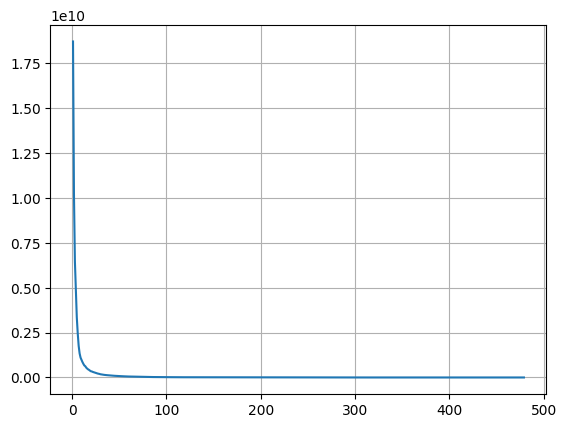

In [34]:
plt.plot(range(1, len(loan+1)), inercias)
plt.grid()

Se amplia la grafia en los datos relevantes


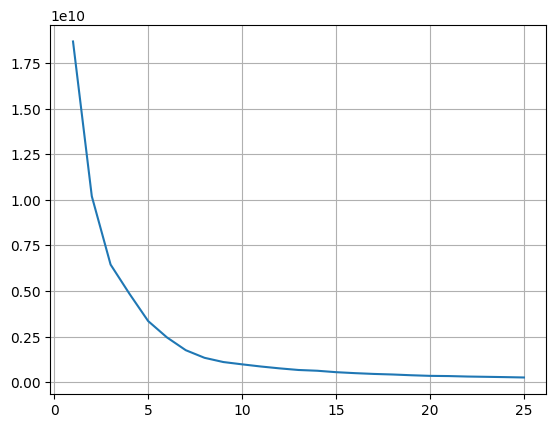

In [43]:
plt.plot(range(1,26), inercias[:25])
plt.grid()

Ahora, es necesario saber cúales y cómo se están tomando los datos. Para así organizarlos y graficarlos

In [56]:
kmeans=KMeans(n_clusters=2, max_iter=200)#muestra como esta tomando las variables
objetivo=kmeans.fit_predict(loan)
print(objetivo)
print(loan)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     genero  casado/solter

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Se imprime el Kmeans de la predicción. Sin embargo, aún no muestra los datos de forma organizada.

In [53]:
objetivos=Kmeans.fit_predict(loan)
print(objetivos)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
print(type(objetivos))
print(len(objetivos))
a=objetivos
print(type(a))
print(len(a))

<class 'numpy.ndarray'>
480
<class 'numpy.ndarray'>
480


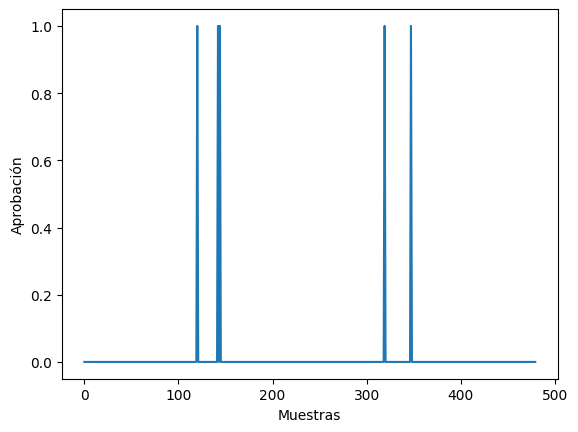

In [59]:
plt.plot(objetivos)#Y indica si se aprobo o no
plt.xlabel('Muestras')
plt.ylabel('Aprobación')
plt.show()# indica q la taza de rechazo es mas alta

Datos organizados

In [62]:
b=np.sort(a) #Concordancia de datos se aprobaron pocos prestamos/se realizó un buen  agrupamiento porque separó acertadamente loos datos
print(b)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


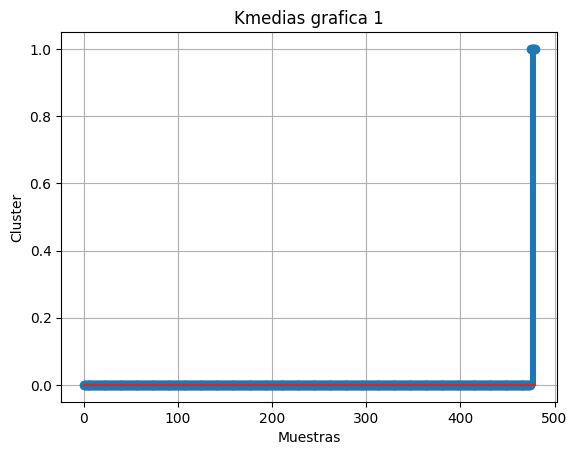

In [66]:
plt.stem(b)
plt.grid()
plt.title('Kmedias grafica 1')
plt.xlabel('Muestras')
plt.ylabel('Cluster')
plt.show()

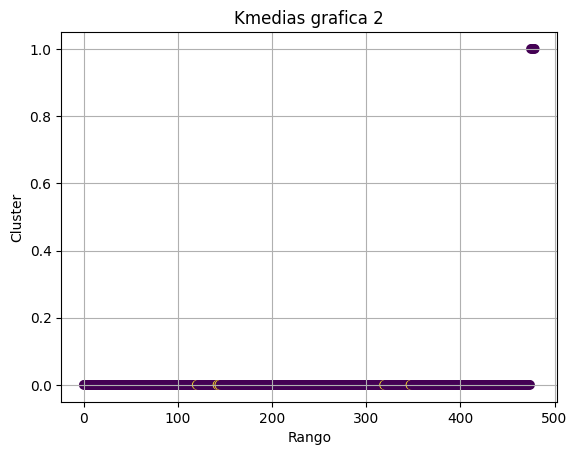

In [67]:
rango=range(0,len(b))
plt.scatter(rango,b,c=Kmeans.labels_)
plt.title('Kmedias grafica 2')
plt.xlabel('Rango')
plt.ylabel('Cluster')
plt.grid()
plt.show()

# CONCLUSIÓN

La agrupación de kmedias fué exitosa, toda la información coincide y los grupos se realizaron correctamente.
Teniendo en cuenta la información, las graficas y que la aprobación del prestamo equivale a 1 y el rechazo del mismo es 0. Se evidencia de la taza de aprobación es muy baja. Aproximadamente solo el 1% de los prestamos llegan a ser aprobados.